In [182]:
import numpy as np
import os
import pandas as pd
import csv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
from sklearn.manifold import MDS
import warnings
warnings.filterwarnings('ignore')

In [183]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'];


### load data (Only taking data_batch_1 for now for all training to limit training time)

In [184]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Locations: Titus ["C:/Users/titus/Documents/CS498/hw3/data_batch_1"]
           Larry ["/Users/poonl/CS498-AML/hw3/data/data_batch_1"] ["C:\Users\lpoon2\Documents\GitHub\CS498-AML\hw3\data"]

In [185]:
data_batch_1 = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/data_batch_1")
data_batch_2 = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/data_batch_2")
data_batch_3 = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/data_batch_3")
data_batch_4 = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/data_batch_4")
data_batch_5 = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/data_batch_5")
test_batch = unpickle("C:/Users/lpoon2/Documents/GitHub/CS498-AML/hw3/data/test_batch")


In [186]:
data_batch_1.keys()

dict_keys([b'data', b'filenames', b'batch_label', b'labels'])

In [187]:
data_batch_1[b'data'].shape

(10000, 3072)

### (1a) Mean image 

In [188]:
sum_mean = np.zeros((10,3072))
count = np.zeros(10)
#sum over all the image data for each category 
for i in range (0, 10000):
    sum_mean[data_batch_1[b'labels'][i]] += data_batch_1[b'data'][i]
    count[data_batch_1[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_2[b'labels'][i]] += data_batch_2[b'data'][i]
    count[data_batch_2[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_3[b'labels'][i]] += data_batch_3[b'data'][i]
    count[data_batch_3[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_4[b'labels'][i]] += data_batch_4[b'data'][i]
    count[data_batch_4[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_5[b'labels'][i]] += data_batch_5[b'data'][i]
    count[data_batch_5[b'labels'][i]] += 1


In [189]:
print(count)

[ 5000.  5000.  5000.  5000.  5000.  5000.  5000.  5000.  5000.  5000.]


In [190]:
mean = sum_mean

In [191]:
#devide by the number of picture it has in that category to get the mean image 
for i in range (0, 10):
    mean[i]=sum_mean[i]/count[i]

In [192]:
%matplotlib inline

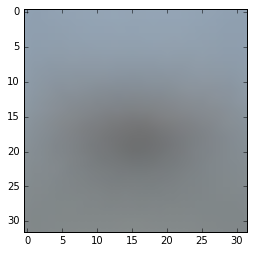

In [193]:
image = np.reshape(mean[0],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

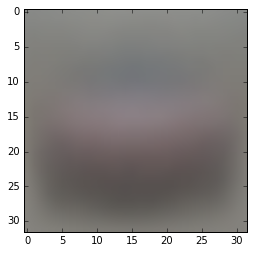

In [194]:
image = np.reshape(mean[1],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

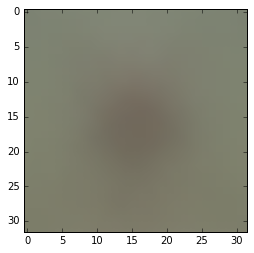

In [195]:
image = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

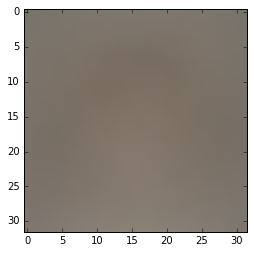

In [196]:
image = np.reshape(mean[3],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

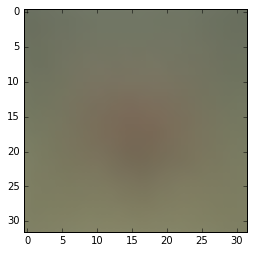

In [197]:
image = np.reshape(mean[4],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

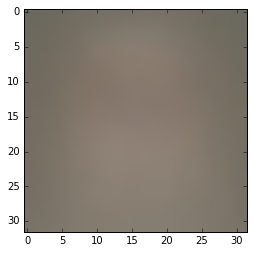

In [198]:
image = np.reshape(mean[5],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

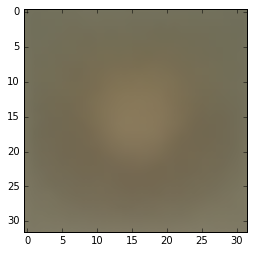

In [199]:
image = np.reshape(mean[6],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

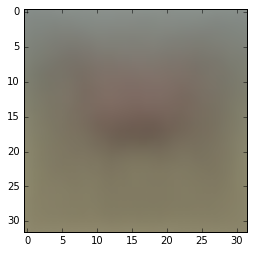

In [200]:
image = np.reshape(mean[7],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

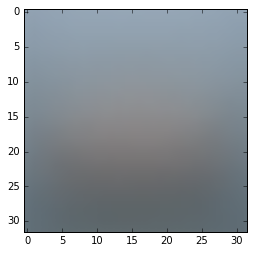

In [201]:
image = np.reshape(mean[8],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

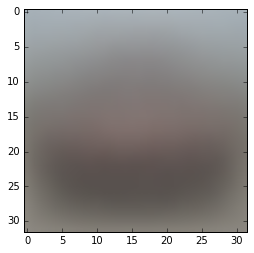

In [202]:
image = np.reshape(mean[9],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

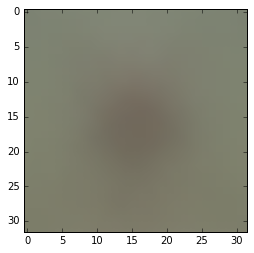

In [203]:
im = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(im)
pyplot.show()



### (1b) first 20 principal components

In [204]:
data_by_labels = [] #storing the image by labels, the list would be in this structure: data_by_labels[labes][row number of image][image data array]
temp_count_loop = np.zeros(10)
size = 2000
for i in range (0,10):
    data_by_labels.append(np.zeros((size, 3072)))


In [205]:
#move data from batch to data_by_labels so data is now by labels for PCA training
# row = class index ; col = i_th data item in that category
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_1[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_1[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_1[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_2[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_2[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_2[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_3[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_3[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_3[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_4[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_4[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_4[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_5[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_5[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_5[b'labels'][i]] += 1

In [206]:
#fit pca on each labels
pca_objs = [PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20)]
for i in range(0,10):
    pca_objs[i].fit(data_by_labels[i])


1


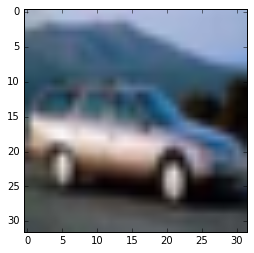

In [207]:
#show the orgainl image and the category number
image = np.reshape(data_batch_1[b'data'][4],(3,32,32)).transpose(1,2,0).astype('uint8')
print(data_batch_1[b'labels'][4])
plt.imshow(image)
pyplot.show()

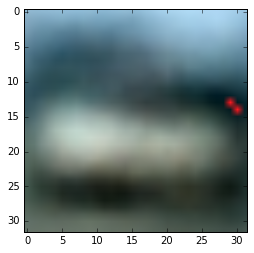

In [208]:
#after applying PCA
reshaped_4th = data_batch_1[b'data'][4].reshape(1,-1) 
apply_pca = pca_objs[1].transform(reshaped_4th)
apply_pca_2 = pca_objs[1].inverse_transform(apply_pca)
apply_pca_3 = np.reshape(apply_pca_2,(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(apply_pca_3)
pyplot.show()

the error is the amount of variation not explained by a principal component which will we equal to pc1 eigen value divided by sum of all the eigen values ???
https://piazza.com/class/jchzguhsowz6n9?cid=489

In [209]:
#Option 2

In [210]:
###Error for each labels
error_by_labels = [] #storing the image by labels, the list would be in this structure: error_by_labels[labes][image data array]

temp_count_loop = np.zeros(10)
mean_loop = np.zeros(10)


for i in range (0,10000):
    getLabelbyObj = data_batch_1[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_1[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_2[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_2[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_3[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_3[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_4[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_4[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_5[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_5[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1

In [211]:
#print error
avg_erro_by_labels = np.zeros(10)
for i in range (0,10):
    avg_erro_by_labels[i] = mean_loop[i]/5000
    print(avg_erro_by_labels[i])

2708820.90113
4075695.48396
2495232.12927
3207702.10051
2241156.76796
3332916.82681
2695076.94275
3519073.23902
2512922.83435
4116291.91367


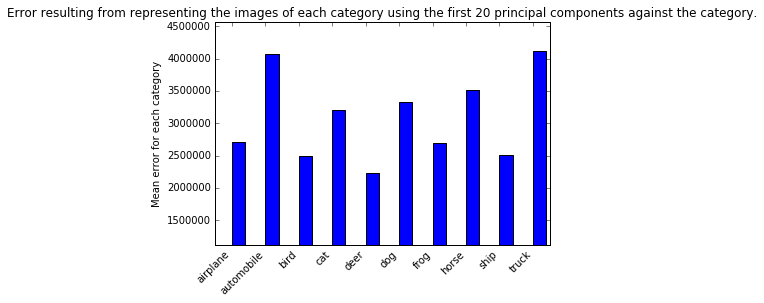

In [212]:
#ploting error in each category 
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
indx = np.arange(1,20,2)

err_blks = plt.bar(indx, avg_erro_by_labels)
 
ax.set_xticks(indx)
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation = 45, ha="right")
ax.set_ylim([min(avg_erro_by_labels)*0.5, max(avg_erro_by_labels)*1.11])
ax.set_ylabel('Mean error for each category')
ax.set_title('Error resulting from representing the images of each category using the first 20 principal components against the category.')
plt.show(block=False)



### 2:  distances between mean image

In [213]:
#euclidean_distances(np.reshape(mean[0],(3,1024)),np.reshape(mean[1],(3,1024)))
test = paired_distances(mean[1].reshape(1,-1),mean[0].reshape(1,-1))


In [214]:
euc_dis = np.zeros((10,10))        
for i in range(0,10):
    for j in range(0,10):
        #euc_dis[i][j] = euclidean_distances(pca_objs[i].explained_variance_,pca_objs[j].explained_variance_)
        euc_dis[i][j] = euclidean_distances(mean[i].reshape(1,-1),mean[j].reshape(1,-1))

In [215]:
# distance matrix calculated by L2 norm required for part 2 
print(euc_dis)

[[  0.00000000e+00   1.65465503e+03   1.58484067e+03   1.88242182e+03
    2.11008401e+03   1.96109250e+03   2.42421761e+03   1.65470567e+03
    9.19950675e+02   1.43756319e+03]
 [  1.65465503e+03   0.00000000e+00   8.83953772e+02   1.02671613e+03
    1.13776231e+03   1.21877343e+03   1.19344256e+03   9.54332215e+02
    1.30795012e+03   9.44628390e+02]
 [  1.58484067e+03   8.83953772e+02   0.00000000e+00   5.21368931e+02
    5.85999635e+02   7.13233961e+02   9.13949897e+02   4.15382115e+02
    1.56205787e+03   1.41897237e+03]
 [  1.88242182e+03   1.02671613e+03   5.21368931e+02   1.72633492e-04
    4.65804687e+02   4.05307426e+02   6.81115281e+02   5.94150861e+02
    1.84963533e+03   1.67870667e+03]
 [  2.11008401e+03   1.13776231e+03   5.85999635e+02   4.65804687e+02
    0.00000000e+00   6.05123522e+02   4.73232007e+02   6.59798285e+02
    2.05626040e+03   1.82371663e+03]
 [  1.96109250e+03   1.21877343e+03   7.13233961e+02   4.05307426e+02
    6.05123522e+02   5.03308792e-04   8.15614

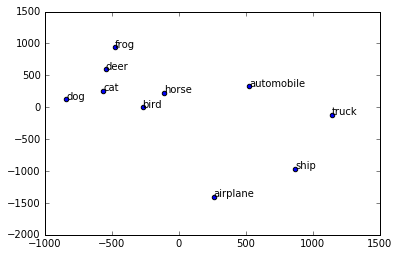

In [216]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(euc_dis)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

### 3  average error obtained by PCA

For class A and class B, define E(A | B) to be the average error obtained by representing all the images of class A using the mean of class A and the first 20 principal components of class B. Now define the similarity between classes to be (1/2)(E(A | B) + E(B | A)). If A and B are very similar, then this error should be small, because A's principal components should be good at representing B.

In [217]:
# #resetting pca object to fit the mean images
# pca_objs = [PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20)]
# for i in range(0,10):
#     pca_objs[i].fit(mean[i].reshape(1,-1))

In [224]:

dist_classes = np.zeros((10,10))

# for a in range(10): 
#     pca_A = pca_objs[a]
#     for b in range(a, 10): 
#         E1 = E2 = 0
#         pca_B = pca_objs[b]
#         for ai in data_by_labels[a]:
            
#             t = pca_B.transform(ai.reshape(1,-1)) #apply PCA on that image
#             t2 = pca_B.inverse_transform(t)
#             ind_error = ai-t2 #individial error
#             sqrsum = np.sum(np.square(ind_error)) # Square those differences individually and sum them over the whole image.
#             E1 =  E1 + sqrsum 
        
#         E1 = E1 / size
#         if a != b : # we can just take E(A|A) without duplicated muliplications 
#             for bi in data_by_labels[b]:
#                 t = pca_A.transform(bi.reshape(1,-1)) #apply PCA on that image
#                 t2 = pca_A.inverse_transform(t)
#                 ind_error = bi-t2 #subtract to get error
#                 sqrsum = np.sum(np.square(ind_error)) # Square those differences individually and sum them over the whole image.
#                 E2 = E2 + sqrsum
#             E2 = E2 /size
            
#         else:
#             E2 = E1
        
#         dist_classes[a][b] = dist_classes[b][a] = 0.5* (E1 + E2)
mean_loop = np.zeros(10)
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_1[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_1[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_2[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_2[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum            
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_3[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_3[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_4[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_4[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_5[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_5[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum

dist_classes = (dist_classes / 5000)/2

In [225]:
# 10 x 10 matrix requited for part 3 
print(dist_classes)

[[ 2708820.9011259   3607670.00568002  2752554.29322623  3180885.7514153
   2580774.1362306   3283280.11358271  2885900.68129546  3314597.61515196
   2719879.02516798  3661807.74659705]
 [ 3607670.00568002  4075695.48396206  3540676.50201297  3903939.31100972
   3385650.16769567  4006284.95986115  3595840.20317154  4090400.86425833
   3471333.33469511  4197030.61934857]
 [ 2752554.29322623  3540676.50201297  2495232.12926974  2923085.87541326
   2423659.02921     2996103.63025392  2674700.16518631  3182411.65408763
   2710710.23892618  3537829.21197929]
 [ 3180885.7514153   3903939.31100972  2923085.87541326  3207702.10051159
   2819389.87004814  3311492.45061702  3021298.43946991  3546286.70445481
   3094644.72276709  3882608.95637642]
 [ 2580774.1362306   3385650.16769567  2423659.02921     2819389.87004814
   2241156.76795683  2922399.30332881  2556736.13496555  3020632.83742228
   2535917.15269211  3408313.24944313]
 [ 3283280.11358271  4006284.95986115  2996103.63025392  3311492.4

In [226]:
#comparing with part 1
for i in range(10):
    print(dist_classes[i,i])

2708820.90113
4075695.48396
2495232.12927
3207702.10051
2241156.76796
3332916.82681
2695076.94275
3519073.23902
2512922.83435
4116291.91367


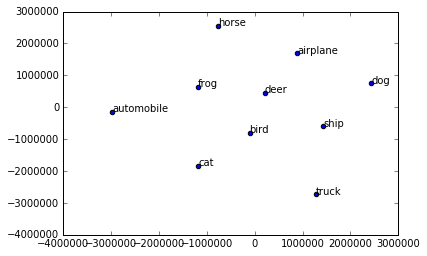

In [227]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist_classes)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()